In [11]:
import pandas as pd
import requests
import lxml.html as lh
import pandas as pd

In [12]:
url='https://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [25]:
[len(T) for T in tr_elements[:12]]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [56]:
tr_elements = doc.xpath('//tr')
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=str(t.text_content()).strip('\n').replace('\n','').replace(' ','')
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Disease"
2:"CountofDiseaseOccurrence"
3:"Symptom"


In [175]:
len(tr_elements)

1867

In [114]:
def prewc(word):
    for i in range(len(word)):
        try:
            int(word)
            return word
        except:
            if word[i]=='_':
                return word[i+1:]
def preoc(i:int):
    word = str(tr_elements[int(i)].text_content().replace('\n  \n  \n  ',',').replace('\n  \n  ','').replace('\n  ','').replace('\n ',''))
    words =[prewc(w)  for w in  word.split(',') ]
    return words

In [219]:
doc={}
a=0
for j in range(1,len(tr_elements)):
    ans = preoc(j)
    #print(ans)
 
    if ans[0]!=None:
        a+=1
        box=[]
        box.append(ans[2])
        doc[str(a)]={'disease':ans[0],
                    'occurence':ans[1],
                    'symptoms':box}
    else:
        box.append(ans[2])

disease=[]
occurrence=[]
symptoms=[]
symptomsno=[]
for c in doc.values():
    sym=''
    for x in c['symptoms']:
        sym+=','+str(x)
    disease.append(c['disease'])
    symptomsno.append(len(c['symptoms']))
    occurrence.append(int(c['occurence']))
    symptoms.append(sym.strip(','))
    

134


In [215]:

df=pd.DataFrame(columns=['Disease', 'Occurrence', 'Symptoms','Symptoms No'])

df['Disease']=disease
df['Occurrence']=occurrence
df['Symptoms']=symptoms
df['Symptoms No']=symptomsno

In [217]:
len(df)

134

In [218]:
df.isna().sum()

Disease        0
Occurrence     0
Symptoms       0
Symptoms No    0
dtype: int64

In [184]:
print(df.iloc[2]['Disease'])


depressionmental^UMLS:C0011581_depressive disorder


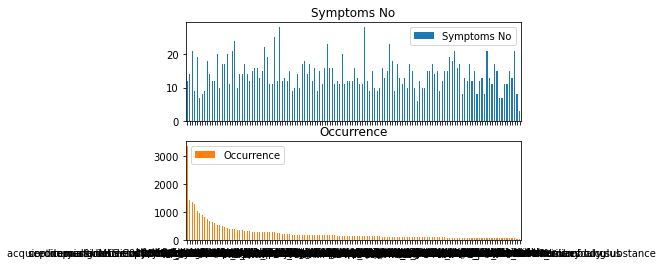

In [220]:
 
newdf= pd.DataFrame({'Symptoms No': symptomsno,
                   'Occurrence': occurrence}, index=disease)
ax = newdf.plot.bar(rot=0,subplots=True)
ax[1].legend(loc=2) 

In [221]:
def unique(list1):
  
    # initialize a null list
    unique_list = []
      
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list
      
ccc =[a for a in df['Symptoms']]
len(unique(','.join(ccc).split(',')))

443

In [222]:
len(','.join(ccc).split(','))

1866

In [223]:
df.to_csv('data_src.csv')